# Vehicle Insurance

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split


In [2]:
insurance = pd.read_csv('insurance_train.csv')
insurance.shape


(381109, 12)

In [3]:
# Reading test to validate in the end

test = pd.read_csv('insurance_test.csv')
test.shape

(127037, 11)

In [4]:
# Checking head

insurance.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [6]:
insurance.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


# Data Analysis

In [7]:
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


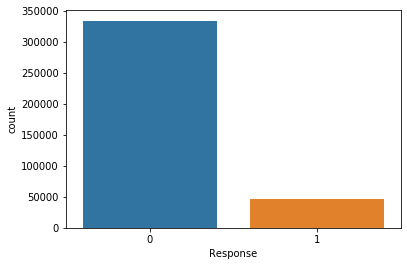

In [8]:
sns.countplot(insurance.Response)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


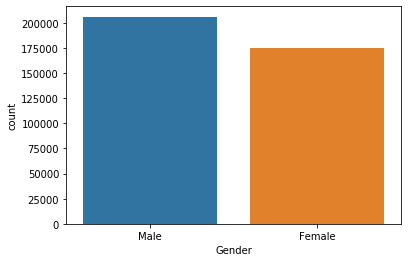

In [9]:
sns.countplot(insurance.Gender)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


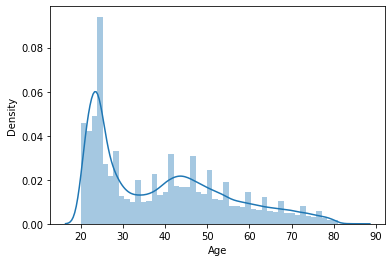

In [10]:
sns.distplot(insurance.Age)

# Feature Engineering

In [11]:
train = pd.get_dummies(insurance)


In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 16 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     381109 non-null  int64  
 1   Age                    381109 non-null  int64  
 2   Driving_License        381109 non-null  int64  
 3   Region_Code            381109 non-null  float64
 4   Previously_Insured     381109 non-null  int64  
 5   Annual_Premium         381109 non-null  float64
 6   Policy_Sales_Channel   381109 non-null  float64
 7   Vintage                381109 non-null  int64  
 8   Response               381109 non-null  int64  
 9   Gender_Female          381109 non-null  uint8  
 10  Gender_Male            381109 non-null  uint8  
 11  Vehicle_Age_1-2 Year   381109 non-null  uint8  
 12  Vehicle_Age_< 1 Year   381109 non-null  uint8  
 13  Vehicle_Age_> 2 Years  381109 non-null  uint8  
 14  Vehicle_Damage_No      381109 non-nu

In [13]:
# It's 15 columns because Response is the variable the we will validate 

test = pd.get_dummies(test)
test.shape

(127037, 15)

In [14]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     127037 non-null  int64  
 1   Age                    127037 non-null  int64  
 2   Driving_License        127037 non-null  int64  
 3   Region_Code            127037 non-null  float64
 4   Previously_Insured     127037 non-null  int64  
 5   Annual_Premium         127037 non-null  float64
 6   Policy_Sales_Channel   127037 non-null  float64
 7   Vintage                127037 non-null  int64  
 8   Gender_Female          127037 non-null  uint8  
 9   Gender_Male            127037 non-null  uint8  
 10  Vehicle_Age_1-2 Year   127037 non-null  uint8  
 11  Vehicle_Age_< 1 Year   127037 non-null  uint8  
 12  Vehicle_Age_> 2 Years  127037 non-null  uint8  
 13  Vehicle_Damage_No      127037 non-null  uint8  
 14  Vehicle_Damage_Yes     127037 non-nu

In [15]:
# test / train 

127037/381109

0.3333350826141602

### 33 % Splitting to test in the after the model is finished, just use it in the end! 

In [16]:
# It's based on the train Data yet in the end we compair to test data :)

train_033, test_033 = train_test_split(train, test_size=0.3333350826141602, random_state=4242)
train_033.shape

(254072, 16)

### First let's split the data in 30%, 20% and 10%

### 30 % Splitting

In [17]:
# Again based on the train data

train_03, test_03 = train_test_split(train, test_size=0.30, random_state=4242)
train_03.shape

(266776, 16)

### 20% Splitting

In [18]:
# Train data!

train_02, test_02 = train_test_split(train, test_size=0.2, random_state=4242)
train_02.shape

(304887, 16)

### 10% Splitting 

In [19]:
train_01, test_01 = train_test_split(train, test_size=0.1, random_state=4242)
train_01.shape

(342998, 16)

In [20]:
# Shape of the splittings (train and test)

print(train_033.shape, test_033.shape)
print(train_03.shape, test_03.shape)
print(train_02.shape, test_02.shape)
print(train_01.shape, test_01.shape)



(254072, 16) (127037, 16)
(266776, 16) (114333, 16)
(304887, 16) (76222, 16)
(342998, 16) (38111, 16)


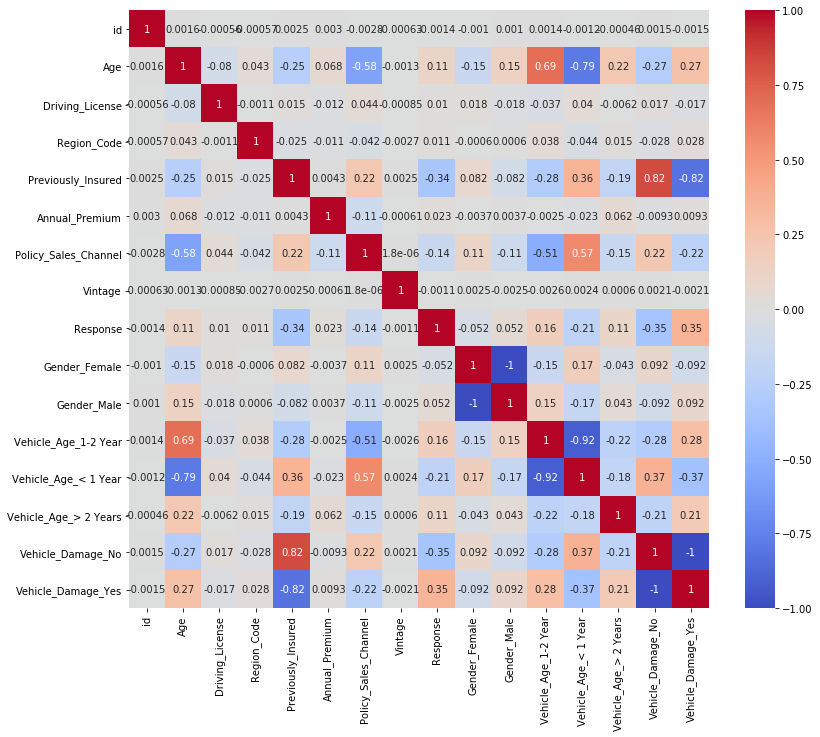

In [21]:
# Heatmap to analyse correlation between the variables

plt.figure(figsize=(13, 11))
sns.heatmap(train.corr(),cmap='coolwarm',annot=True)

In [22]:
print("Find most important features relative to target")
corr = train.corr()
corr.sort_values(['Response'], ascending = False, inplace = True)
print(corr.Response)

Find most important features relative to target
Response                 1.000000
Vehicle_Damage_Yes       0.354400
Vehicle_Age_1-2 Year     0.164317
Age                      0.111147
Vehicle_Age_> 2 Years    0.109300
Gender_Male              0.052440
Annual_Premium           0.022575
Region_Code              0.010570
Driving_License          0.010155
Vintage                 -0.001050
id                      -0.001368
Gender_Female           -0.052440
Policy_Sales_Channel    -0.139042
Vehicle_Age_< 1 Year    -0.209878
Previously_Insured      -0.341170
Vehicle_Damage_No       -0.354400
Name: Response, dtype: float64


### Maybe it's necessary drop the ID, Vintage, columns in both (Test and Train doesn't seem that add value)

# Modeling and Evaluations

- Logistic Regression


- Random Forest Classifier

In [23]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import f1_score, roc_auc_score,accuracy_score,confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report 

from sklearn.model_selection import KFold



### Defining X_train, X_test, y_train, y_test for 30%

In [24]:
X_train = train_03.drop(['Response'],axis=1)
y_train = train_03.filter(['Response'])
X_test = test_03.drop(['Response'],axis=1)
y_test = test_03.filter(['Response'])

### Logistic Regression

In [25]:
model = LogisticRegression(random_state=4242)
model.fit(X_train, y_train)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4242, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
preds = model.predict(X_test)
print('Simple Logistic Regression accuracy: ', accuracy_score(y_test, preds))
print('Simple Logistic Regression f1_score: ', f1_score(y_test, preds))

Simple Logistic Regression accuracy:  0.8773669894081324
Simple Logistic Regression f1_score:  0.0


In [27]:
def plot_confusion_matrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

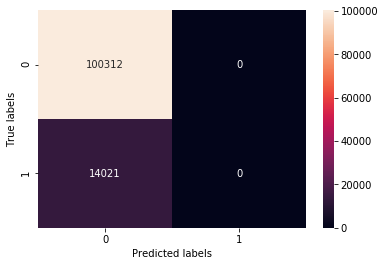

In [28]:
plot_confusion_matrix(y_test, preds)

### Random Forest Classifier

In [29]:
clf = RandomForestClassifier(random_state=4242)
clf.fit(X_train,y_train)





/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4242,
                       verbose=0, warm_start=False)

In [30]:
y_pred=clf.predict(X_test)


In [31]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8722853419397725


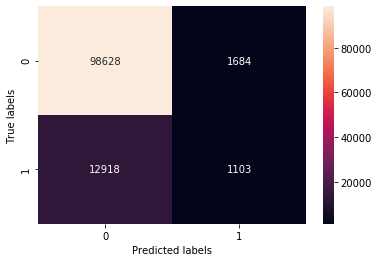

In [32]:
plot_confusion_matrix(y_test, y_pred)

### Defining X_train, X_test, y_train, y_test for 20%

In [33]:
X_train = train_02.drop(['Response'],axis=1)
y_train = train_02.filter(['Response'])
X_test = test_02.drop(['Response'],axis=1)
y_test = test_02.filter(['Response'])

### Logistic Regression

In [34]:
model = LogisticRegression(random_state=4242)
model.fit(X_train, y_train)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4242, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
preds = model.predict(X_test)
print('Simple Logistic Regression accuracy: ', accuracy_score(y_test, preds))
print('Simple Logistic Regression f1_score: ', f1_score(y_test, preds))

Simple Logistic Regression accuracy:  0.877463199601165
Simple Logistic Regression f1_score:  0.0


In [36]:
def plot_confusion_matrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

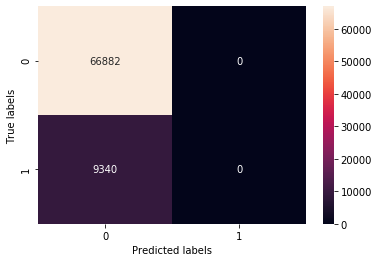

In [37]:
plot_confusion_matrix(y_test, preds)

### Random Forest Classifier

In [38]:
clf = RandomForestClassifier(random_state=4242)
clf.fit(X_train,y_train)





/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4242,
                       verbose=0, warm_start=False)

In [39]:
y_pred=clf.predict(X_test)


In [40]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8722678491774029


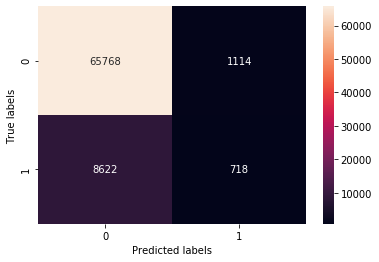

In [41]:
plot_confusion_matrix(y_test, y_pred)

### Defining X_train, X_test, y_train, y_test for 10%

In [42]:
X_train = train_01.drop(['Response'],axis=1)
y_train = train_01.filter(['Response'])
X_test = test_01.drop(['Response'],axis=1)
y_test = test_01.filter(['Response'])

### Logistic Regression

In [43]:
model = LogisticRegression(random_state=4242)
model.fit(X_train, y_train)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4242, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
preds = model.predict(X_test)
print('Simple Logistic Regression accuracy: ', accuracy_score(y_test, preds))
print('Simple Logistic Regression f1_score: ', f1_score(y_test, preds))

Simple Logistic Regression accuracy:  0.8771483298785128
Simple Logistic Regression f1_score:  0.0


In [45]:
def plot_confusion_matrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

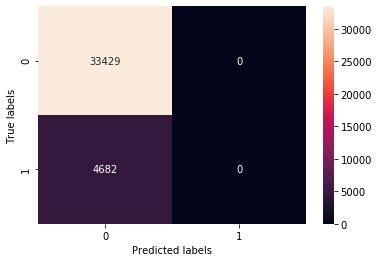

In [46]:
plot_confusion_matrix(y_test, preds)

### Random Forest Classifier

In [47]:
clf = RandomForestClassifier(random_state=4242)
clf.fit(X_train,y_train)





/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4242,
                       verbose=0, warm_start=False)

In [48]:
y_pred=clf.predict(X_test)


In [49]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8714544357272178


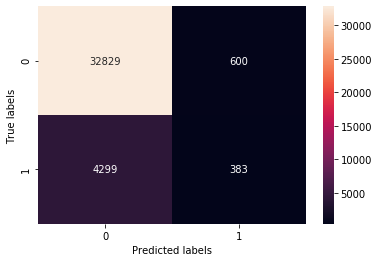

In [50]:
plot_confusion_matrix(y_test, y_pred)

### Checking model vs test data

### Using 33%

In [51]:
#X_train = test
#y_train = train_033.filter(['Response'])
X_test = test
y_test = test_033.filter(['Response'])

### Logistic Regression

In [52]:
# Note that here is X_test, y_test instead of X_train, y_train
# I think is the way to validate your model when you get new data!

model = LogisticRegression(random_state=4242)
model.fit(X_test, y_test)

/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4242, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
preds = model.predict(X_test)
print('Simple Logistic Regression accuracy: ', accuracy_score(y_test, preds))
print('Simple Logistic Regression f1_score: ', f1_score(y_test, preds))

Simple Logistic Regression accuracy:  0.8778938419515574
Simple Logistic Regression f1_score:  0.0


In [54]:
def plot_confusion_matrix(y_real, y_pred):
    cm = confusion_matrix(y_real, y_pred)

    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax, fmt='g')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')

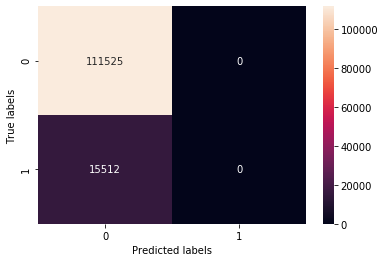

In [55]:
plot_confusion_matrix(y_test, preds)

### Random Forest Classifier

In [56]:
# Again X_test, y_test

clf = RandomForestClassifier(random_state=4242)
clf.fit(X_test,y_test)





/Users/Giuliano/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=4242,
                       verbose=0, warm_start=False)

In [57]:
y_pred=clf.predict(X_test)


In [58]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999448979431189


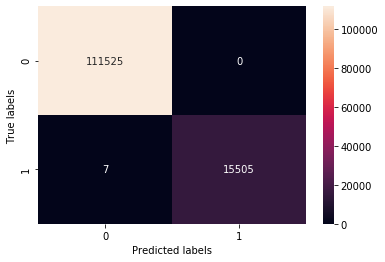

In [59]:
plot_confusion_matrix(y_test, y_pred)